In [81]:
import pandas as pd
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [85]:
train_df = pd.read_csv('../Resources/creditScore_train.csv')
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [86]:
l_dict = {"Poor":"1", "Standard":"2", "Good":"3"}

for key, value in l_dict.items():
    train_df["Credit_Score"] = train_df["Credit_Score"].str.replace(key, value)



train_df["Credit_Score"] = train_df["Credit_Score"].astype("int")



In [87]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [88]:
X = train_df.copy()
X.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN','Type_of_Loan','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'], inplace=True)
# X = X.drop_duplicates()
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,3
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,3
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,3
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,3
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,3


In [89]:
y = train_df["Credit_Score"].ravel()
y[:5]

array([3, 3, 3, 3, 3])

In [90]:
y.shape

(100000,)

In [91]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.001, random_state=78)

In [92]:
scaler = StandardScaler()


In [93]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [94]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [95]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=78)

In [96]:
 # Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [97]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [98]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [99]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,27152,1806,22
Actual 1,1303,51395,412
Actual 2,0,290,17520


Accuracy Score : 0.9616316316316317
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.94      0.95     28980
           2       0.96      0.97      0.96     53110
           3       0.98      0.98      0.98     17810

    accuracy                           0.96     99900
   macro avg       0.96      0.96      0.96     99900
weighted avg       0.96      0.96      0.96     99900



In [100]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.40726690419157413, 'Credit_Score'),
 (0.08700083943824209, 'Delay_from_due_date'),
 (0.06874958871026396, 'Num_of_Delayed_Payment'),
 (0.06135907308401469, 'Num_Credit_Inquiries'),
 (0.058733778677127556, 'Num_Bank_Accounts'),
 (0.05106778466154647, 'Interest_Rate'),
 (0.04425269662571585, 'Total_EMI_per_month'),
 (0.034200693538915874, 'Monthly_Inhand_Salary'),
 (0.03361720790900712, 'Num_Credit_Card'),
 (0.02722983029288358, 'Changed_Credit_Limit'),
 (0.025920105462778252, 'Annual_Income'),
 (0.025817294801999256, 'Age'),
 (0.0253879271843696, 'Outstanding_Debt'),
 (0.015555978748158297, 'Credit_History_Age'),
 (0.011791212362313877, 'Amount_invested_monthly'),
 (0.009608899574029368, 'Monthly_Balance'),
 (0.008908399927663516, 'Num_of_Loan'),
 (0.003531784809396471, 'Credit_Utilization_Ratio')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

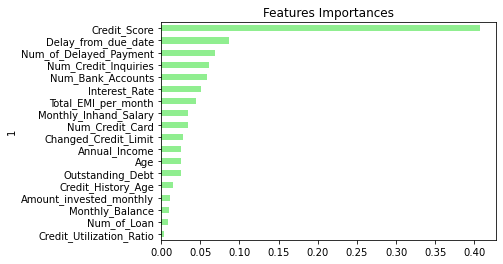

In [101]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [102]:
# Save the Model
from joblib import dump
dump(rf_model, 'model.joblib')

['model.joblib']